In [1]:
%run tools.ipynb

([<matplotlib.axis.XTick at 0x2b8000f54d68>,
 <a list of 12 Text xticklabel objects>)

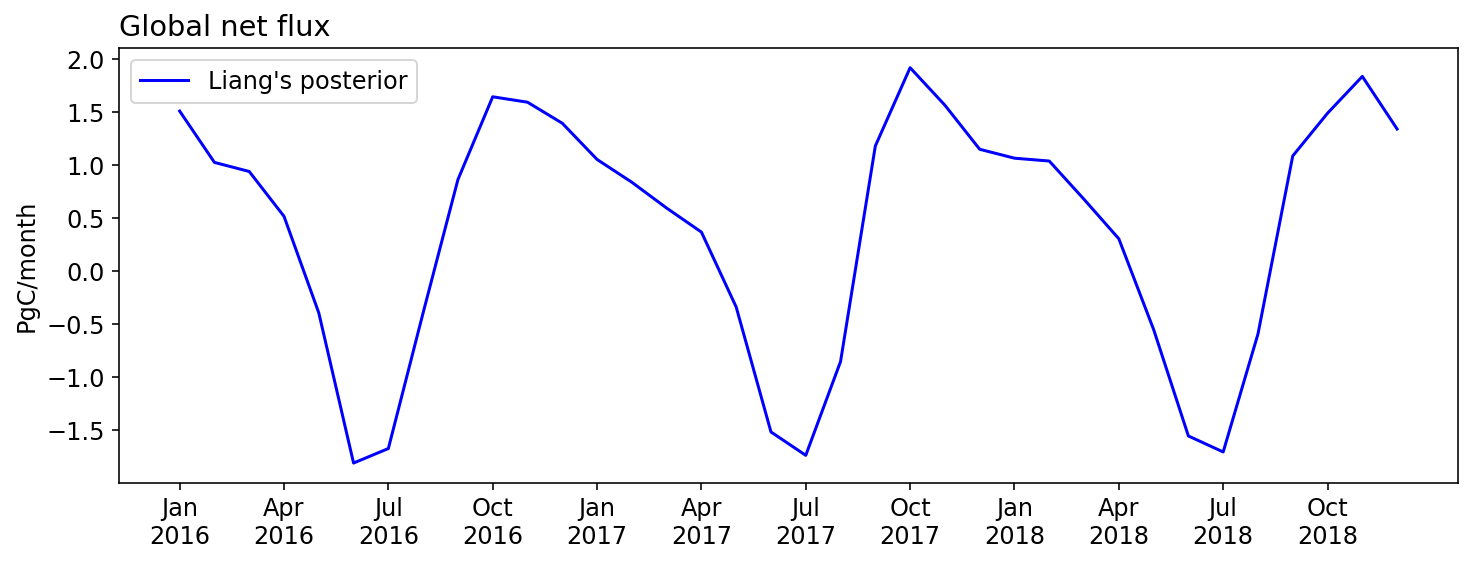

In [33]:
nm_years = 3
first_year = 2016
monthly_net_flux_years = np.zeros(nm_years*12)

# Liang's posterior
fname = '/geos/u73/msadiq/GEOS-Chem/rundirs/ensemble_runs/liang/oco2_v9_2014_2018_monthly_flux.nc'
ds_liang = xr.open_dataset(fname)
varname  = 'flux'           # unit: kgC/m2/d
dr_3years = ds_liang[varname][-nm_years*12:,:,:]/(24*3600) # last 3 years, 2016-2018

for i in range(3):
    dr_monthly_total = unit_convert2_dr_monthly(dr_3years[i*12:(i+1)*12,:,:], 2016+i, 4., 5.)
    net_flux_monthly = np.sum(dr_monthly_total, axis = (1,2))*1e-12
    #ax.plot(range(1,13), net_flux_monthly, label = "Liang's posterior: " + str(2016+i))
    monthly_net_flux_years[i*12:(i+1)*12] = net_flux_monthly

fig, ax = plt.subplots(figsize=[12, 4])
# prior
#ax.plot(range(1,13), net_flux_2018, label = 'prior', color = 'black')
#ax.plot(range(1,13), net_flux_2018 + update_array, label = 'posterior', color = 'red')
ax.plot(range(1,nm_years*12+1), monthly_net_flux_years, label = "Liang's posterior", color = 'blue')
plt.title('Global net flux', loc='left')
plt.ylabel('PgC/month')
plt.legend()

ticks = []
for iyear in range(nm_years):
    for imonth in range(1,13,3):
        ticks.append(short_name_of_month(imonth) + '\n' + str(iyear+first_year))
plt.xticks(range(1,nm_years*12+1,3), ticks)
#fig.savefig(mod_dir + 'inversion_global_TC67.png', dpi = 300)
